In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.tree import export_graphviz
import graphviz

# Import dataset
blueberry_df = pd.read_csv("train.csv")
blueberry_df = blueberry_df.drop(columns=["id"])

# Define features and target variable
label = "yield"
features = list(blueberry_df.columns)
features.remove(label)
X = blueberry_df[features]
y = blueberry_df[label]

# Split data into train and test sets
test_size = 0.2
seed = 25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Standardize features
scaler = StandardScaler().set_output(transform = "pandas")
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Random Forest
# Since we are predicting continuous value, we need to use random forest regressor instead of random forest classifier
rf = RandomForestRegressor()
# Tuning Hyper-parameter using GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Grid search
grid_search.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [8]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("Mean Absolute Percentage Error:", mape)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Absolute Percentage Error: 0.06068786975933381
Mean Absolute Error: 346.3696186346155
Mean Squared Error: 289360.6110745047
R-squared: 0.8363621335299771


In [16]:
grid_search_results = pd.DataFrame(grid_search.cv_results_)
# print(grid_search_results.columns)
# grid_search_results[['param_n_estimators','param_min_samples_split', 'mean_test_score', 'std_test_score', 'rank_test_score']]
grid_search_results[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_bootstrap', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score']]



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.557105,0.284438,0.050939,0.010776,True,10,1,2,50,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.828572,0.798769,0.802295,0.809879,0.013296,45
1,6.624104,0.355175,0.090357,0.031376,True,10,1,2,100,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.829391,0.799287,0.802579,0.810419,0.013482,39
2,7.771460,0.511897,0.122132,0.010409,True,10,1,2,200,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.829787,0.800097,0.803263,0.811049,0.013313,35
3,2.163146,0.470590,0.035101,0.006836,True,10,1,5,50,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.828246,0.800284,0.802199,0.810243,0.012754,42
4,3.468100,0.009227,0.056767,0.000792,True,10,1,5,100,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.830101,0.799954,0.804391,0.811482,0.013290,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,7.776991,0.550667,0.096564,0.002944,False,30,4,5,100,"{'bootstrap': False, 'max_depth': 30, 'min_sam...",0.733317,0.728358,0.722141,0.727939,0.004572,122
158,15.635967,0.519099,0.198849,0.020524,False,30,4,5,200,"{'bootstrap': False, 'max_depth': 30, 'min_sam...",0.733279,0.728318,0.722087,0.727895,0.004579,124
159,3.769207,0.339937,0.061695,0.016187,False,30,4,10,50,"{'bootstrap': False, 'max_depth': 30, 'min_sam...",0.744206,0.733987,0.731772,0.736655,0.005415,113
160,7.242284,0.498674,0.091895,0.002367,False,30,4,10,100,"{'bootstrap': False, 'max_depth': 30, 'min_sam...",0.744236,0.733979,0.731789,0.736668,0.005426,112


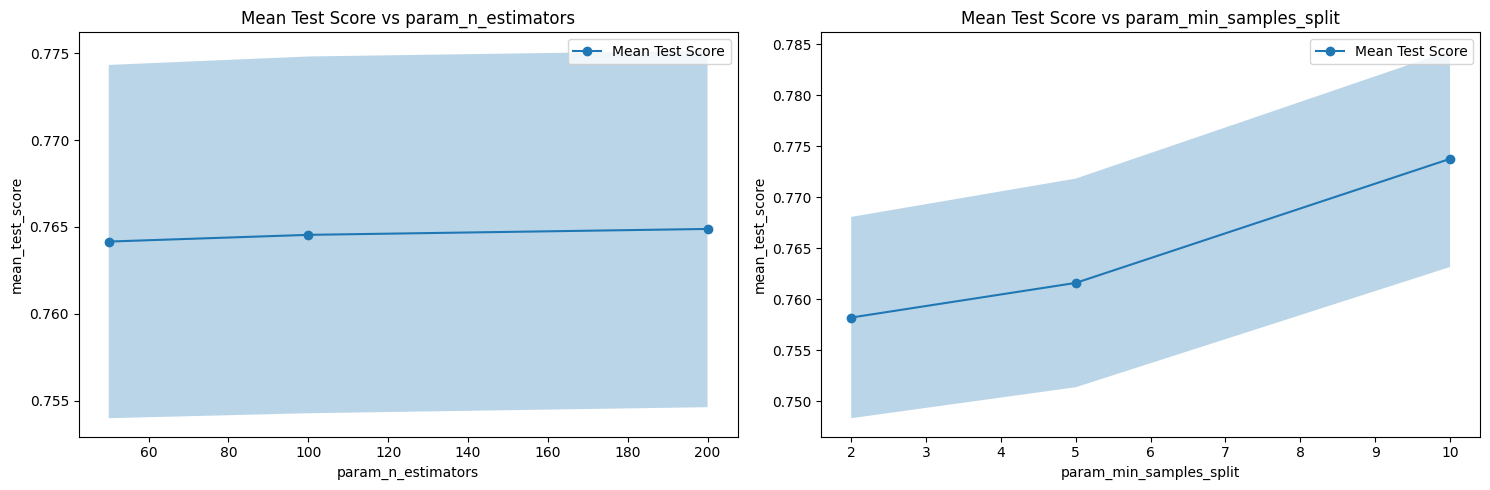

In [10]:
import matplotlib.pyplot as plt

# Calculating average mean_test_score, std_test_score, rank_test_score for each distinct param_n_estimators
n_estimators_stats = grid_search_results.groupby('param_n_estimators').agg({'mean_test_score': 'mean', 'std_test_score': 'mean', 'rank_test_score': 'mean'}).reset_index()

# Calculating average mean_test_score, std_test_score, rank_test_score for each distinct param_min_samples_split
min_samples_split_stats = grid_search_results.groupby('param_min_samples_split').agg({'mean_test_score': 'mean', 'std_test_score': 'mean', 'rank_test_score': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(15, 5))

# Plot for n_estimators
plt.subplot(1, 2, 1)
plt.plot(n_estimators_stats['param_n_estimators'], n_estimators_stats['mean_test_score'], marker='o', label='Mean Test Score')
plt.fill_between(n_estimators_stats['param_n_estimators'],
                 n_estimators_stats['mean_test_score'] - n_estimators_stats['std_test_score'],
                 n_estimators_stats['mean_test_score'] + n_estimators_stats['std_test_score'], alpha=0.3)
plt.xlabel('param_n_estimators')
plt.ylabel('mean_test_score')
plt.title('Mean Test Score vs param_n_estimators')
plt.legend()

# Plot for min_samples_split
plt.subplot(1, 2, 2)
plt.plot(min_samples_split_stats['param_min_samples_split'], min_samples_split_stats['mean_test_score'], marker='o', label='Mean Test Score')
plt.fill_between(min_samples_split_stats['param_min_samples_split'],
                 min_samples_split_stats['mean_test_score'] - min_samples_split_stats['std_test_score'],
                 min_samples_split_stats['mean_test_score'] + min_samples_split_stats['std_test_score'], alpha=0.3)
plt.xlabel('param_min_samples_split')
plt.ylabel('mean_test_score')
plt.title('Mean Test Score vs param_min_samples_split')
plt.legend()

plt.tight_layout()
plt.show()

'param_bootstrap', 'param_max_depth', 'param_min_samples_leaf',


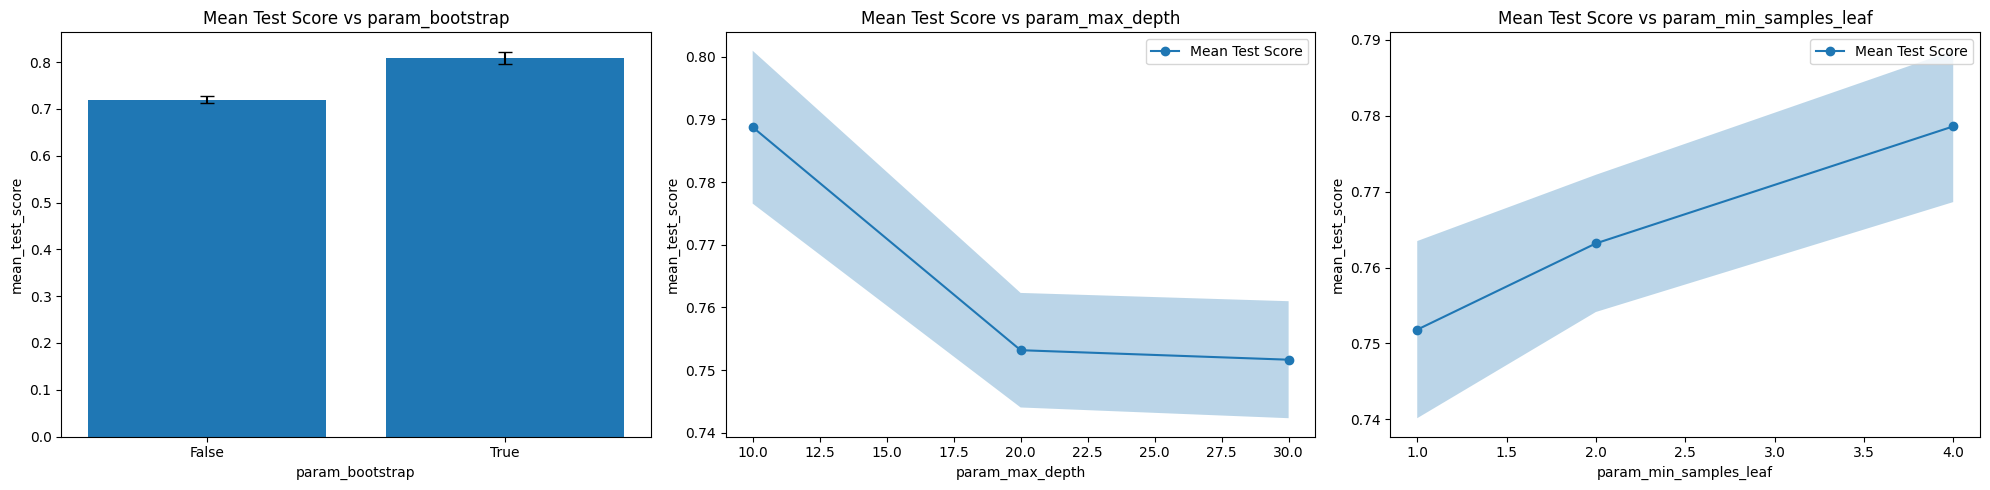

In [18]:
# Plotting
plt.figure(figsize=(20, 5))

# Plot for param_bootstrap
plt.subplot(1, 3, 1)
plt.bar(['False', 'True'], bootstrap_stats['mean_test_score'], yerr=bootstrap_stats['std_test_score'], capsize=5)
plt.xlabel('param_bootstrap')
plt.ylabel('mean_test_score')
plt.title('Mean Test Score vs param_bootstrap')

# Plot for param_max_depth
plt.subplot(1, 3, 2)
plt.plot(max_depth_stats['param_max_depth'], max_depth_stats['mean_test_score'], marker='o', label='Mean Test Score')
plt.fill_between(max_depth_stats['param_max_depth'],
                 max_depth_stats['mean_test_score'] - max_depth_stats['std_test_score'],
                 max_depth_stats['mean_test_score'] + max_depth_stats['std_test_score'], alpha=0.3)
plt.xlabel('param_max_depth')
plt.ylabel('mean_test_score')
plt.title('Mean Test Score vs param_max_depth')
plt.legend()

# Plot for param_min_samples_leaf
plt.subplot(1, 3, 3)
plt.plot(min_samples_leaf_stats['param_min_samples_leaf'], min_samples_leaf_stats['mean_test_score'], marker='o', label='Mean Test Score')
plt.fill_between(min_samples_leaf_stats['param_min_samples_leaf'],
                 min_samples_leaf_stats['mean_test_score'] - min_samples_leaf_stats['std_test_score'],
                 min_samples_leaf_stats['mean_test_score'] + min_samples_leaf_stats['std_test_score'], alpha=0.3)
plt.xlabel('param_min_samples_leaf')
plt.ylabel('mean_test_score')
plt.title('Mean Test Score vs param_min_samples_leaf')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
for i in range(5):
    tree = best_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,
                               filled=True,
                               rounded=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Output hidden; open in https://colab.research.google.com to view.